# Homework: scaling file I/O experiment Part1


Write Python code that can create a CSV containing 10 columns of text data
Each entry in each row should be between 3 and 25 characters. The characters should be a mix of numeric and non-numeric. (Having all numeric data is not allowed.)
Adjacent rows in a CSV should not be the same
Generate files of size {0.1, 1, 5, 10, 100, 500} MB of data
Execution time for creating all of the CSV files should take less than 5 minutes.
Measure how much time it takes to write each CSV file to disk. In your measurement do not include the time used in creating the CSV files. Perform this measurement three times per file size. Each measurement is of a different CSV.
Measure how much time it takes for your computer to load the data into a Pandas dataframe. Perform this measurement three times per file size. Each measurement is of a different CSV.


Results: 
table of values (file size versus read time and write time for each experiment) 

Plot the average write times and average load times versus file size in a single plot


In [1]:

import pandas as pd
import string
import matplotlib.pyplot as plt
import random as rand
from faker import Faker
fake = Faker()

In [2]:
from csv import writer
from random import sample, randrange


In [3]:
import time
import os

In [4]:
#Function to generate fake data
def generate_fake_data(row = 50):
    import random
    global timetowritefiles
    global timetoreadfiles
    fake = Faker()
    output = [{    'name':fake.name(),
                    'date':fake.date(),
                    'country':fake.country(),
                    'company':fake.company(),
                    'city':fake.city(),
                     'email':fake.ascii_email(),              
                      'ID':''.join(random.choice('0123456789ABCDEF') for i in range(10)),
                    'domain name':fake.domain_name(),
                    'day of month':fake.day_of_month(),
                   'CarReg':''.join(random.choice('0123456789ABCDEF') for i in range(10))} for x in range(row)]
    return output

In [5]:

#Function to write fake data into CSV files in 10 columns
def write_to_CSV(size, file):

    with open(file, 'w') as v:
        write = writer(v)
        start = time.time()
        data=generate_fake_data()
        while True:
                if round(os.path.getsize(file)/(1024*1024),2) < size:
                    write.writerow(data)
                   # write.writerows(data)
                    
                else:
                    end = time.time()
                    size1=round(os.path.getsize(file)/(1024*1024),2)
                    break
    return round(end-start,3)

In [13]:
#function capturing readtime
def readtime(size_type):
    content={}
    read_size = pd.DataFrame(index=['0.1MB','1.0MB','5.0MB', '10.0MB','100.0MB','500.0MB'],columns=['1','2','3'])
    for size in size_type:
        k=1
        for j in range(3):
            file = "DataFile_" + str(size)+ '_' + str(k)+".csv"
            start_time = time.time()
            content = pd.read_csv(file)
            MB=(str(size) + 'MB')
            k=k+1
            print(file + " - completed")
            read_size.loc[MB][j] = time.time() - start_time
    print("********************")
    print("Readtime function end")
    return read_size
    

In [7]:
def writetime(size_type):
    write_size = pd.DataFrame(index=['0.1MB','1.0MB','5.0MB', '10.0MB','100.0MB','500.0MB'],columns=['1','2','3'])
    for size in size_type:
        k=1
        for j in range(3):
            file = "DataFile_" + str(size)+ '_' + str(k)+".csv"
            write_time = write_to_CSV(size,file)
            MB=(str(size) + 'MB')
            write_size.loc[MB][j] = write_time
            k=k+1
            print(file + " - completed")
    print("********************")
    print("Writetime function end")

    return write_size

In [8]:
size_type = [.1,1.0,5.0, 10.0,100.0,500.0]
write_size=writetime(size_type)

DataFile_0.1_1.csv - completed
DataFile_0.1_2.csv - completed
DataFile_0.1_3.csv - completed
DataFile_1.0_1.csv - completed
DataFile_1.0_2.csv - completed
DataFile_1.0_3.csv - completed
DataFile_5.0_1.csv - completed
DataFile_5.0_2.csv - completed
DataFile_5.0_3.csv - completed
DataFile_10.0_1.csv - completed
DataFile_10.0_2.csv - completed
DataFile_10.0_3.csv - completed
DataFile_100.0_1.csv - completed
DataFile_100.0_2.csv - completed
DataFile_100.0_3.csv - completed
DataFile_500.0_1.csv - completed
DataFile_500.0_2.csv - completed
DataFile_500.0_3.csv - completed
********************
Writetime function end


In [9]:
write_size

,1,2,3
0.1MB,0.27,0.193,0.173
1.0MB,0.251,0.295,0.253
5.0MB,0.601,0.677,0.633
10.0MB,1.015,1.007,1.175
100.0MB,9.132,12.678,11.583
500.0MB,50.459,59.483,59.845


In [10]:
write_mean = write_size.mean(axis=1)
write_mean

0.1MB       0.212000
1.0MB       0.266333
5.0MB       0.637000
10.0MB      1.065667
100.0MB    11.131000
500.0MB    56.595667
dtype: float64

In [14]:
read_size=readtime(size_type)

DataFile_0.1_1.csv - completed
DataFile_0.1_2.csv - completed
DataFile_0.1_3.csv - completed
DataFile_1.0_1.csv - completed
DataFile_1.0_2.csv - completed
DataFile_1.0_3.csv - completed
DataFile_5.0_1.csv - completed
DataFile_5.0_2.csv - completed
DataFile_5.0_3.csv - completed
DataFile_10.0_1.csv - completed
DataFile_10.0_2.csv - completed
DataFile_10.0_3.csv - completed
DataFile_100.0_1.csv - completed
DataFile_100.0_2.csv - completed
DataFile_100.0_3.csv - completed
DataFile_500.0_1.csv - completed
DataFile_500.0_2.csv - completed
DataFile_500.0_3.csv - completed
********************
Readtime function end


In [15]:
read_size

,1,2,3
0.1MB,0.0275218,0.0140073,0.012511
1.0MB,0.0250168,0.023514,0.0220158
5.0MB,0.0710528,0.0785532,0.0680652
10.0MB,0.123104,0.162671,0.157557
100.0MB,1.31275,1.18484,1.16489
500.0MB,5.85042,5.72081,5.35534


In [16]:
read_mean = read_size.mean(axis=1)
read_mean

0.1MB      0.018013
1.0MB      0.023516
5.0MB      0.072557
10.0MB     0.147777
100.0MB    1.220826
500.0MB    5.642190
dtype: float64

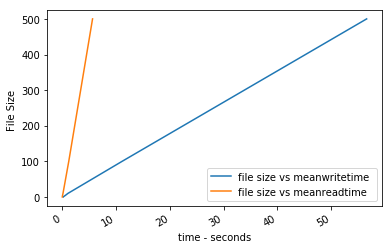

In [22]:
listofsizes= [0.1, 1, 5, 10,100,500]
l1= plt.plot(write_mean,listofsizes,label="file size vs meanwritetime ")
l2 = plt.plot(read_mean,listofsizes,label="file size vs meanreadtime ")
plt.gcf().autofmt_xdate()
plt.ylabel('File Size ')
plt.xlabel('time - seconds')
plot.set_title('Mean CSV file R/W time')
plt.legend()
plt.show()